<a href="https://colab.research.google.com/github/Mitalinvs/Major_Project-Red_Wine_Quality_Prediction-ML-/blob/main/Complete%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install pycaret &> /dev/null
from pycaret.utils import version

In [ ]:
#loading the dataset to a pandas Dataframe
df = pd.read_csv('/content/Wine_Quality.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# number of rows and columns
df.shape

(1599, 12)

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.describe()  #describe --> statistical measures of the data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#Data Analysis and Visulaization

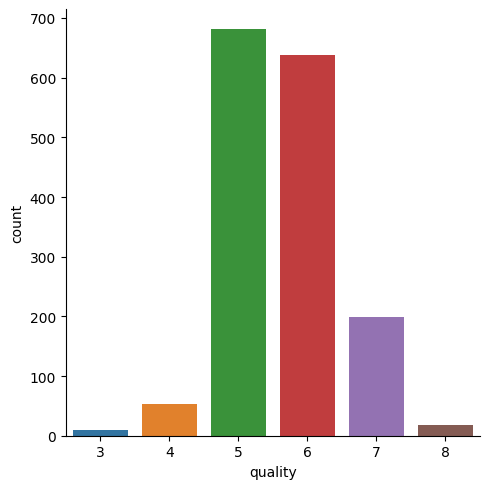

In [ ]:
# number of values for each quality
import seaborn as sns
sns.catplot(x='quality', data = df, kind = 'count')

<ipython-input-5-b9b7fc305f2c>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='quality', y = 'volatile acidity', data = df, ci=None)


<Axes: xlabel='quality', ylabel='volatile acidity'>

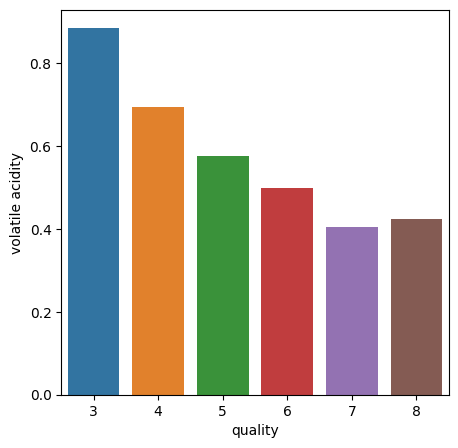

In [ ]:
# volatile acidity vs Quality
import matplotlib.pyplot as plt
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = df, ci=None)

<ipython-input-6-d0b3ce315a26>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='quality', y= 'citric acid', data = df, ci=None)


<Axes: xlabel='quality', ylabel='citric acid'>

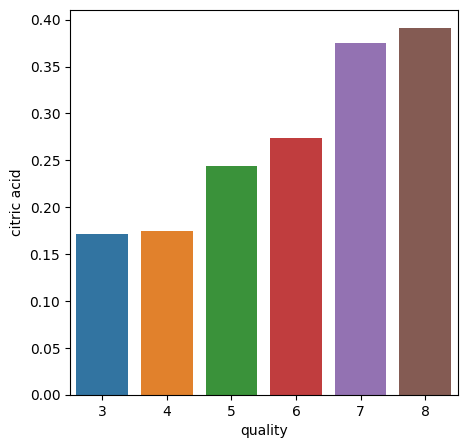

In [ ]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y= 'citric acid', data = df, ci=None)

#Data Processing

**Data Cleaning**

In [ ]:
# checking for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

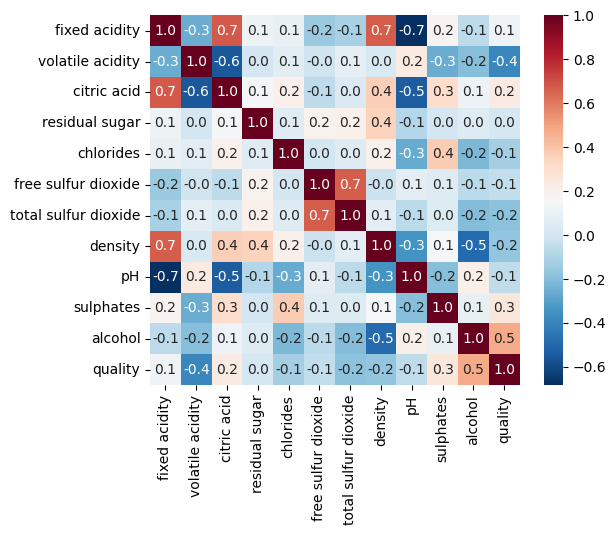

In [ ]:
#Checking Correlation for redundant features
import matplotlib.pyplot as plt
correction = df.corr()
sns.heatmap(correction, annot=True, cbar=True, square=True, fmt='.1f', cmap="RdBu_r")
# from here we can see alcohol is showing the maximum positive correlation with quality i.e. its the best feature

**Data Transformation**

**Normalisation**

In [ ]:
# converting quality column, if quality is greater than or equal to 7 to be 1 else 0
df['quality']= df['quality'].apply(lambda x: 1 if x>=7 else 0)
df['quality'].head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

data_scale = scale.fit_transform(df)
data_scaled = pd.DataFrame(data_scale)
data_scaled.columns = df.columns
data_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.0


#Model Training

**Model Comparison**

In [ ]:
from pycaret.classification import *
s= setup(data= df, target='quality')
cm= compare_models()

,Description,Value
0,Session id,4139
1,Target,quality
2,Target type,Binary
3,Original data shape,"(1599, 12)"
4,Transformed data shape,"(1599, 12)"
5,Transformed train set shape,"(1119, 12)"
6,Transformed test set shape,"(480, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9071,0.9183,0.4996,0.7468,0.5883,0.5391,0.5584,0.4910
et,Extra Trees Classifier,0.9053,0.9336,0.4663,0.7454,0.5650,0.5160,0.5382,0.2100
lightgbm,Light Gradient Boosting Machine,0.9026,0.9174,0.5446,0.6785,0.5972,0.5433,0.5513,1.0670
xgboost,Extreme Gradient Boosting,0.8981,0.9079,0.5579,0.6434,0.5930,0.5356,0.5400,0.0870
gbc,Gradient Boosting Classifier,0.8910,0.9033,0.4288,0.6574,0.5132,0.4556,0.4717,0.2210
lr,Logistic Regression,0.8821,0.8730,0.2958,0.6199,0.3941,0.3412,0.3714,0.5630
lda,Linear Discriminant Analysis,0.8821,0.8758,0.4212,0.5931,0.4870,0.4237,0.4343,0.0300
ada,Ada Boost Classifier,0.8740,0.8637,0.3821,0.5571,0.4470,0.3797,0.3915,0.1370
ridge,Ridge Classifier,0.8686,0.0000,0.0983,0.6367,0.1639,0.1328,0.2041,0.0470
dt,Decision Tree Classifier,0.8678,0.7436,0.5729,0.5288,0.5394,0.4638,0.4705,0.0310


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Let's use RandomForest because as we saw in our analysis there are some outliers and correlation between features which will affect less with RandomForest model

**Model Creation**

In [ ]:
# Splitting the dataset into predictor variable(X) and target variable (y).
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
# Splitting predictor and target variable into training and testing datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

Decision trees are simple, easy-to-understand models that work well for many problems, but they can also be unstable and prone to overfitting. Random Forest overcomes these limitations by using an ensemble of decision trees, where each tree is trained on a random subset of the data and a random subset of the features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

<BarContainer object of 11 artists>

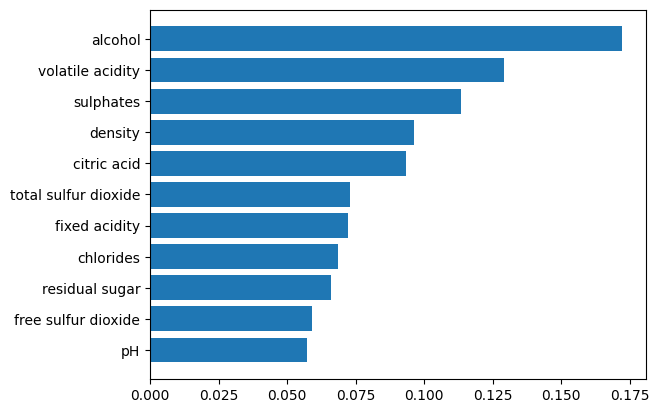

In [ ]:
# Plotting the feature importance
sort_ind = rf_model.feature_importances_.argsort()
plt.barh(df.columns[sort_ind],rf_model.feature_importances_[sort_ind])

**Model Evaluation**

In [ ]:
# printing the accuracy of training and testing data
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
y_pred_train = rf_model.predict(x_train)
y_pred_test = rf_model.predict(x_test)
print('Accuracy score of Random Forest with training dataset is : ', accuracy_score(y_pred_train,y_train))
print('Accuracy score of Random Forest with testing dataset is : ', accuracy_score(y_pred_test,y_test))

Accuracy score of Random Forest with training dataset is :  1.0
Accuracy score of Random Forest with testing dataset is :  0.91


In [ ]:
# checking how the model works with different data
# Cross_val_score is a method which runs cross validation on a dataset to test whether the model can generalise over the whole dataset.
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
cross_val_score(rf_model,X,y,cv=10).mean()

0.873062106918239

In [ ]:
# printing the confusion matrix
print(confusion_matrix(y_pred_test,y_test))

[[339  20]
 [ 16  25]]


In [ ]:
#printing the classification report
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       359
           1       0.56      0.61      0.58        41

    accuracy                           0.91       400
   macro avg       0.76      0.78      0.77       400
weighted avg       0.91      0.91      0.91       400



#Predicting

In [ ]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine
